<a href="https://colab.research.google.com/github/Kggzzz/KKU_data_mining/blob/master/Final_Exam_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. จากข้อมูล (```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv```) ใน http://qr.tebs.io/TTGDFf สร้าง model เพื่อทำนาย (Classification) ว่าผลการ search เป็นร้านอาหารหรือไม่(```is_food = = True```) โดยพิจารณาจาก 
- วันในสัปดาห์ที่ทำการ search (```Monday-Sunday```) 
- วันในที่ทำการ search (```1-31```)
- เวลาที่ทำการ search (```1-24```)

หมายเหตุที่ 1 สามารถใช้ function ที่ให้มาช่วยในการทำงานได้
1. ```extract_time()``` ซึ่ง input เป็น ```timestamp``` และ output เป็น ```เวลาที่ทำการ search``` ```วันในที่ทำการ search``` ```วันในสัปดาห์ที่ทำการ search```

2. ```is_food``` ซึ่ง input เป็น ```category_name``` และ ```output``` เป็น คำตอบว่า ```เป็นร้านอาหารหรือไม่```

หมายเหตุที่ 2 ควรเตรียมข้อมูลโดยรวมข้อมูลจาก ตาราง ```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv``` ให้ได้ในรูปแบบ ต่อไปนี้
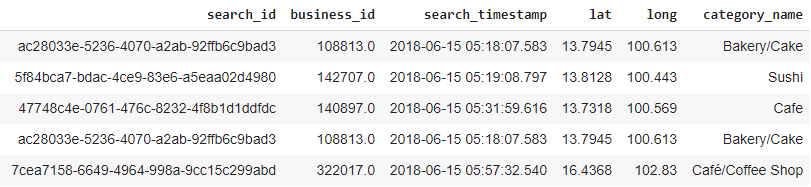

(200 คะแนน)

In [28]:
import datetime
def extract_time(datetime_s):
    EX_date = datetime.datetime.strptime(datetime_s, "%Y-%m-%d %H:%M:%S.%f")
    return EX_date.hour, EX_date.day, get_day(EX_date.weekday()) 

def get_day(D):
    weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    return weekdays[D] 

def is_food(inp):
    food_list = ['Vegeterian','Sushi','Sukiyaki/Shabu','Street Food/Food Stands','Steak House/Barbeque','Southern Food','Seafood','Ramen','Quick Meal','Pizza','Northern Food','Noodles','Mexican','Korean',
             'Japanese','Italian','Izakaya','Healthy Food','German Food','Fusion Food','French','Food Truck','Fastfood','Dim Sum','Delivery Only','Chinese','Cafe','Café/Coffee Shop','Buffet',
             'Breakfast/Brunch','Bakery/Cake','Barbeque/Grill','American']
    return inp in food_list

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

path = '/content/drive/My Drive/Final Exam'

Mounted at /content/drive


In [3]:
import os
import pandas

In [4]:
w_restaurant = os.path.join(path,'w_restaurant.csv')  #สร้างที่อยู่โดยใช้ os.path.join
search_click = os.path.join(path,'search_click.csv')
search_request = os.path.join(path,'search_request.csv')

In [5]:
w_restaurant = pandas.read_csv(w_restaurant)
w_restaurant.head()
#ใช้หัวตารางจาก w_restaurant คือ category_name

,Unnamed: 0,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [6]:
search_click = pandas.read_csv(search_click)
search_click.head()
#ใช้หัวตาราง search_click มี search_id business_id

,Unnamed: 0,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,0,2018-06-15 05:11:38.914154,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2222397704154000,True
1,1,2018-06-15 06:30:51.277476,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,460838273476000,True
2,2,2018-06-15 06:32:09.558025,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2581491438025000,True
3,3,2018-06-15 06:00:59.820390,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1404578985390000,True
4,4,2018-06-15 05:23:36.828525,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,933358625525000,True


In [7]:
search_request = pandas.read_csv(search_request)
search_request.head() 
#ใช้หัวตาราง search_request คือ search_id search_timestamp	lat  long

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


In [35]:
w_restaurant_df = w_restaurant[['category_name']]

#เลือกเฉพาะหัวตารางที่ต้องการ คือ 'category_name'

In [36]:
w_restaurant_df.head()

,category_name
0,Orthodontic
1,Quick Meal
2,Historical/Religion
3,Karaoke
4,Café/Coffee Shop


In [37]:
w_restaurant_df.shape

(246847, 1)

In [38]:
w_restaurant_df.isnull().any()

#หาค่า missing 

category_name    False
dtype: bool

In [19]:
search_click_df = search_click[['search_id','business_id']]

#เลือกเฉพาะหัวตารางที่ต้องการ คือ  'search_id','business_id'

In [32]:
search_click_df.head() 

,search_id,business_id
0,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0
1,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0
2,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0
3,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0
4,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0


In [20]:
search_click_df.shape

(7882037, 2)

In [33]:
search_click_df.isnull().any()

#หาค่า missing

search_id      True
business_id    True
dtype: bool

In [41]:
search_click_df_nm = search_click_df.dropna()

#ทำการแก้ค่า missing โดยการใช้ dropna เพื่อลบ missing นั้นออก

In [42]:
search_click_df_nm.isnull().any()

#เรียกดูเพื่อเช็คว่ายังมีค่า missing อีกไหม

search_id      False
business_id    False
dtype: bool

In [44]:
search_click_df_nm.shape

(7880121, 2)

In [23]:
search_request_df = search_request[['search_id','search_timestamp','lat','long']]

#เลือกเฉพาะหัวตารางที่ต้องการ คือ 'search_id','search_timestamp','lat','long'

In [39]:
search_request_df.head() 

,search_id,search_timestamp,lat,long
0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,12.6347,101.463
1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,14.8009,102.534
2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,13.7383,100.371
3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,12.6669,101.861
4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,12.2372,99.88


In [22]:
search_request_df.shape

(10004357, 4)

In [40]:
search_request_df.isnull().any()

#หาค่า missing

search_id           False
search_timestamp    False
lat                  True
long                 True
dtype: bool

In [45]:
search_request_df_nm = search_request_df.dropna()

#ทำการแก้ค่า missing โดยการใช้ dropna เพื่อลบ missing นั้นออก

In [46]:
search_request_df_nm.isnull().any()

#เรียกดูเพื่อเช็คว่ายังมีค่า missing อีกไหม

search_id           False
search_timestamp    False
lat                 False
long                False
dtype: bool

In [47]:
search_request_df_nm.shape 

(7197711, 4)

In [88]:
table1= search_click_df_nm.merge(search_request_df_nm,how='left',left_on='search_id',right_on='search_id')
table1

,search_id,business_id,search_timestamp,lat,long
0,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,NaN,NaN,NaN
1,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,NaN,NaN,NaN
2,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,NaN,NaN,NaN
3,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,NaN,NaN,NaN
4,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,NaN,NaN,NaN
...,...,...,...,...,...
7880116,9ecd2dc1-b6f6-486d-b751-33eb16c53951,16614.0,2018-06-28 01:59:06.275,13.758,100.56
7880117,9ecd2dc1-b6f6-486d-b751-33eb16c53951,16614.0,2018-06-28 01:59:06.275,13.758,100.56
7880118,d086453d-7fde-4766-af39-8205f0f0a4aa,19569.0,2018-06-28 06:48:45.175,12.9324,100.885
7880119,d157eba1-15e6-4f7a-b090-27a311d976a0,227719.0,2018-06-28 06:35:34.618,13.6908,101.083


In [89]:
table1 = table1.dropna()

#ทำการแก้ค่า missing โดยการใช้ dropna เพื่อลบ missing นั้นออก

In [90]:
table1.head()

,search_id,business_id,search_timestamp,lat,long
34,ac28033e-5236-4070-a2ab-92ffb6c9bad3,108813.0,2018-06-15 05:18:07.583,13.7945,100.613
35,5f84bca7-bdac-4ce9-83e6-a5eaa02d4980,142707.0,2018-06-15 05:19:08.797,13.8128,100.443
36,47748c4e-0761-476c-8232-4f8b1d1ddfdc,140897.0,2018-06-15 05:31:59.616,13.7318,100.569
37,ac28033e-5236-4070-a2ab-92ffb6c9bad3,108813.0,2018-06-15 05:18:07.583,13.7945,100.613
38,7cea7158-6649-4964-998a-9cc15c299abd,322017.0,2018-06-15 05:57:32.540,16.4368,102.83


In [91]:
table1.shape

(2549987, 5)

In [92]:
table2= pandas.concat([table1,w_restaurant_df])
table2

,search_id,business_id,search_timestamp,lat,long,category_name
34,ac28033e-5236-4070-a2ab-92ffb6c9bad3,108813.0,2018-06-15 05:18:07.583,13.7945,100.613,NaN
35,5f84bca7-bdac-4ce9-83e6-a5eaa02d4980,142707.0,2018-06-15 05:19:08.797,13.8128,100.443,NaN
36,47748c4e-0761-476c-8232-4f8b1d1ddfdc,140897.0,2018-06-15 05:31:59.616,13.7318,100.569,NaN
37,ac28033e-5236-4070-a2ab-92ffb6c9bad3,108813.0,2018-06-15 05:18:07.583,13.7945,100.613,NaN
38,7cea7158-6649-4964-998a-9cc15c299abd,322017.0,2018-06-15 05:57:32.540,16.4368,102.83,NaN
...,...,...,...,...,...,...
246842,NaN,NaN,NaN,NaN,NaN,Sushi
246843,NaN,NaN,NaN,NaN,NaN,Karaoke
246844,NaN,NaN,NaN,NaN,NaN,Steak House/Barbeque
246845,NaN,NaN,NaN,NaN,NaN,Café/Coffee Shop


In [98]:
table2.isnull().any()

search_id           False
business_id         False
search_timestamp    False
lat                 False
long                False
category_name       False
dtype: bool

In [99]:
 food_list = ['Vegeterian','Sushi','Sukiyaki/Shabu','Street Food/Food Stands','Steak House/Barbeque','Southern Food','Seafood','Ramen','Quick Meal','Pizza','Northern Food','Noodles','Mexican','Korean',
             'Japanese','Italian','Izakaya','Healthy Food','German Food','Fusion Food','French','Food Truck','Fastfood','Dim Sum','Delivery Only','Chinese','Cafe','Café/Coffee Shop','Buffet',
             'Breakfast/Brunch','Bakery/Cake','Barbeque/Grill','American']

In [101]:
for is_food in food_list : 
     print(is_food)

Vegeterian
Sushi
Sukiyaki/Shabu
Street Food/Food Stands
Steak House/Barbeque
Southern Food
Seafood
Ramen
Quick Meal
Pizza
Northern Food
Noodles
Mexican
Korean
Japanese
Italian
Izakaya
Healthy Food
German Food
Fusion Food
French
Food Truck
Fastfood
Dim Sum
Delivery Only
Chinese
Cafe
Café/Coffee Shop
Buffet
Breakfast/Brunch
Bakery/Cake
Barbeque/Grill
American


#Cassification แบบ KNN  เพื่อหาว่า search เป็นร้านอาหารหรือไม่
 
โดยมีขั้นตอนดังนี้ 
1. Import ข้อมูลที่ต้องการใช้


2. Define นิยามให้ตัว modle หน้าตาเป็นยังไง คือ k เป็นเท่าไหร่ โหวตยังไง วัดระยะอย่างไร  


3. Train(fit) สร้าง modle โดย input ตัวแปรเข้ามา 2ตัว คือ X และ y


4. Test วัดผลว่ามันดีแค่ไหน 
โดยในการ test จะใช้ .predict_proba เป็นการคำนวณความน่าจะเป็นว่าจะอยู่กลุ่มไหน แทนที่จะทำนายชัดลงไปเลยว่าอยู่กลุ่มไหน

5. Evaluate 

    การเลือกโมเดลที่ดีที่สุดที่แท้จริง

    1.แบ่งข้อมูลเป็น train กับ test และเก็บ test เอาไว้
    2.ทำ k-fold cross validation เพื่อเลือกโมเดลที่ดีที่สุด
    3.Train model ที่ดีที่สุด ด้วย training set แล้ววัดผลด้วย test set 

    ถ้าผลมีค่าใกล้เคียง 1 มากแสดงว่า seach เป็นร้านอาหารจริง 




2. จากข้อมูล (```reduced_marketbasket.csv```) ใน http://qr.tebs.io/TTGDFf ให้เปรียบเทียบ รูปแบบ การซื้อที่น่าสนใจเป็นราย Transaction ของประชากรใน ประเทศ ```United Kingdom``` กับ ประเทศอื่นๆ (```'Country'!='United Kingdom'```)

(80 คะแนน)

In [72]:
import os 
import pandas as pd
 
reduced_marketbasket = os.path.join(path,'reduced_marketbasket.csv')  #สร้างที่อยู่โดยใช้ os.path.join

In [74]:
data_Country = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin1')
data_Country.head() 

#ถ้า import ปกติโค้ดจะ error ของ csv เพราะใน data เรายังเป็นตัวอักษรแปลกๆ มันจึงบอกให้ใส่ encoding แล้วเลือกใส่ latin1 ฯลฯ

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [77]:
#จากตาราง data_Country เราจะ .groupby ประเทศ ('Country')

data_Country_Quantity = data_Country.groupby('Country').sum().sort_values('Quantity',ascending=False)
data_Country_Quantity

,Quantity,UnitPrice,CustomerID
Country,,,
United Kingdom,4263829,2.245715e+06,5.626433e+09
Netherlands,200128,6.492550e+03,3.419054e+07
EIRE,142637,4.844719e+04,1.103917e+08
Germany,117448,3.766600e+04,1.200751e+08
France,110480,4.303199e+04,1.076489e+08
Australia,83653,4.054750e+03,1.569300e+07
Sweden,35637,1.806830e+03,6.790083e+06
Switzerland,30325,6.813690e+03,2.377592e+07
Spain,26824,1.263345e+04,3.268929e+07


In [78]:
transacs = data_Country.groupby('InvoiceNo')['StockCode'].apply(list)
transacs 
#ตัว c ใน InvoiceNo คือการลบสินค้าออกไป

InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
C581484                                              [23843]
C581490                                       [22178, 23144]
C581499                                                  [M]
C581568                                              [21258]
C581569                                       [84978, 20979]
Name: StockCode, Length: 25900, dtype: object

In [79]:
!pip install apyori
# ทำการติดตั้งแพ็คเกจ apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=44d6469233d6906cb799dd3d73062bdffdd3166a0f548269bdd7c3343b1f3366
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [80]:
from apyori import apriori

In [81]:
list(apriori(transacs,min_support = 0.02, min_cofidence = 0.1))
# min_support = 0.02 คือ กำหนดให้เท่า 0.02 แปลว่า ทุกกฎที่โผล่มา transacs เกิดขึ้นซ้ำๆประมาณ 500 คือ 0.02 คูณกับ Row 25900
# min_cofidence = 0.1 คือ เอา sup มาหารด้วย sup แต่ละอัน

[RelationRecord(items=frozenset({'15036'}), support=0.020193050193050194, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'15036'}), confidence=0.020193050193050194, lift=1.0)]),
 RelationRecord(items=frozenset({'20685'}), support=0.027181467181467182, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20685'}), confidence=0.027181467181467182, lift=1.0)]),
 RelationRecord(items=frozenset({'20711'}), support=0.02054054054054054, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20711'}), confidence=0.02054054054054054, lift=1.0)]),
 RelationRecord(items=frozenset({'20712'}), support=0.033667953667953665, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20712'}), confidence=0.033667953667953665, lift=1.0)]),
 RelationRecord(items=frozenset({'20713'}), support=0.02602316602316602, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozen

3. เขียนคำศัพท์ที่ได้เรียนในวิชาพร้อมทั้งคำนิยามที่เป็นคำพูดของนักศึกษาเอง (ห้าม search google) 20 คำ

(คำละ 0.5 คะแนน)

1. import os : เพื่อเรียกใช้การทำงานที่เกี่ยวกับไฟล์ทั้งหมด
2. path : สร้างตัวแปรเป็นที่อยู่ของไฟล์นั้นๆ
3. listdir : คือจะแสดงไฟล์ทั้งหมดตามที่อยู่ที่เราต้องการแสดง
4. pyplot : เป็นแพ็กเกจที่เอาไว้ใช้พล็อตกราฟ คำสั่งแรก คือ scatter โดยเอาแต่ละจุดไปพล็อตที่กราฟ x และ y
5. .describe() :  คือสถิติที่ใช้อธิบาย เป็นคำสั่งที่ใช้คำนวณค่ากลาง ค่าการกระจายของตาราง
6. Variable : เป็นสร้างตัวแปรให้เป็น อักษรตัวใดตัวหนึ่ง แล้วกำหนดให้เท่ากับค่าใดค่าหนึ่ง โดยใช้ = 
7. list :  คือ set ของตัวแปรหรือกลุ่มของตัวแปร ลำดับของตัวแปรในข้อมูลที่มีความสำคัญ โดยสามารถเพิ่มสมาชิกในlist ด้วย [...]
8. len : ความยาวของlist ว่ามีสมาชิกกี่ตัว
9. .append : เป็นการเพิ่มสมาชิกเข้าไปใน list ว่าง 
10. .split() : เป็นการแยกตัวสมาชิกออกจาก str โดยการตัดด้วยช่องว่าง คือการเอาช่องว่างมาแยก
11. range : คือการสร้าง list ที่ไล่ตั้งแต่ 0 ถึงเลขก่อนหน้า
คำสั่งที่ช่วยไม่ให้เราเขียน list ยาว คือ range : สร้าง list ขึ้นมาใหม่
12. If statement เงื่อนไข (<, >, <=, >=, ==, !=) : คือถ้าเงื่อนไขตรงถึงจะแสดงผลลัพธ์ออกมา ถ้าไม่ตรงก็จะไม่แสดงออกมา
13. else : เป็นอีกตัวที่บอกว่าถ้าไม่แสดงอย่างแรก ก็จะให้แสดงอย่างที่สอง
14. Funtion() : คือการทำงานที่แปลงค่าข้อมูล input แล้ว output ออกมา เป็นการเก็บโค๊ดที่เขียนไปแล้วเก็บไว้ใน function เพื่อใช้เรียกมาใหม่
15. .merge() : เป็นการรวม 2 ตารางเข้าด้วยกัน merge two tables(.merge()) ถ้าเรามี 1 ตารางแล้วต้องการนำตารางอื่นมาต่อท้ายจะใช้คำสั่งนี้ โดยมีชื่อตารางหลักมีkeyอะไร ตารางรองเชื่อมด้วยkey 
16. .zeros : คือสร้าง array ที่ทุกค่าเป็น 0
17. .shape : คือบอกจำนวนแถวและหลัก ของ เมตริกซ์
18. del : ใช้ลบค่าใน dict ที่ต้องการออก
19. .from_dict : เรียกใช้เพื่อสร้างตาราง
20. .iloc : มองตารางจาก pandas ให้เป็น Numpy คือ มีแถวและหลัก